In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv


In [36]:
path = "/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# handle null values
data.dropna(inplace=True)

In [6]:
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,0,3,female,39.0,0,5,29.125,Q
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
889,1,1,male,26.0,0,0,30.000,C
890,0,3,male,32.0,0,0,7.750,Q


In [7]:
# convert categorical variables to numerical values

data["Sex"] = data["Sex"].map({"male":0, "female": 1})
data["Embarked"] = data["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [9]:
# split the data into training and testing sets

X = data.drop("Survived",axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# train a logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
 #make predictions on the testing set and evaluate performance
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)


Accuracy: 0.7972027972027972


In [12]:
# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

data.info

<bound method DataFrame.info of      Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500         0
1           1       1    1  38.0      1      0  71.2833         1
2           1       3    1  26.0      0      0   7.9250         0
3           1       1    1  35.0      1      0  53.1000         0
4           0       3    0  35.0      0      0   8.0500         0
..        ...     ...  ...   ...    ...    ...      ...       ...
885         0       3    1  39.0      0      5  29.1250         2
886         0       2    0  27.0      0      0  13.0000         0
887         1       1    1  19.0      0      0  30.0000         0
889         1       1    0  26.0      0      0  30.0000         1
890         0       3    0  32.0      0      0   7.7500         2

[712 rows x 8 columns]>

In [13]:
# Get Overall Statistics About The Dataframe

data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.261236
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [17]:
# Data Filtering

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
data[data["Sex"] == "male"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
data[data["Name"] == "Braund, Mr. Owen Harris"]["Age"]

0    22.0
Name: Age, dtype: float64

In [24]:
# Check Null Values In The Dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

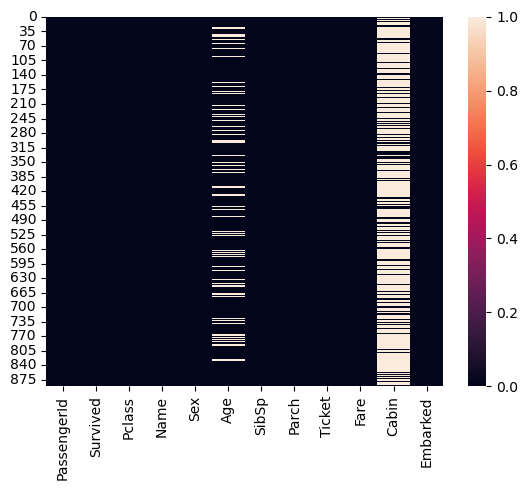

In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(data.isnull())

In [38]:
#Drop the Column
print(data.columns)
#data.drop("Age", axis=1, inplace=True)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [37]:
# Handle Missing Values
data["Embarked"].mode()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [39]:
data["Embarked"].fillna("S", inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [41]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [44]:
# Categorical Data Encoding
data["Sex"].map({"male":0, "femamale":1})

0      0.0
1      NaN
2      NaN
3      NaN
4      0.0
      ... 
886    0.0
887    NaN
888    NaN
889    0.0
890    0.0
Name: Sex, Length: 891, dtype: float64

In [50]:
# 11. What is Univariate Analysis?
#How Many People Survived And How Many Died?
#How Many Passengers Were In First Class, Second Class, and Third Class?
#Number of Male And Female Passengers
print(data.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [49]:
ppl_survived = data["Survived"].value_counts()
print(ppl_survived)

0    549
1    342
Name: Survived, dtype: int64


In [56]:
data["Pclass"].value_counts()

passenger_count = data.groupby("Pclass").count()["PassengerId"]
print(passenger_count)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


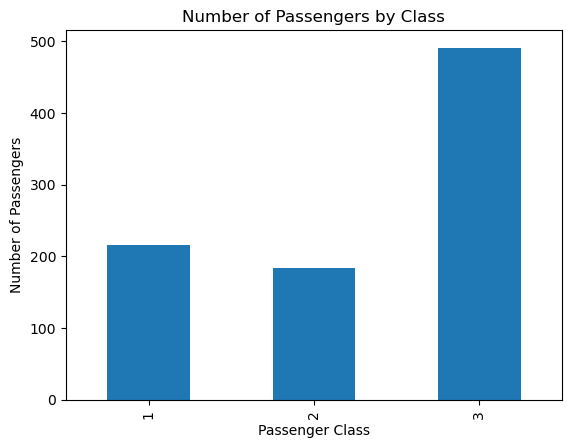

In [60]:
# Create a bar plot of the passenger counts by class
passenger_count.plot(kind="bar")

# Add axis labels and a title to the plot
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Class')

# Display the plot
plt.show()

In [ ]:
#12. Bivariate Analysis
#How Has Better Chance of Survival Male or Female?
#Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)? 
#13. Feature Engineering

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


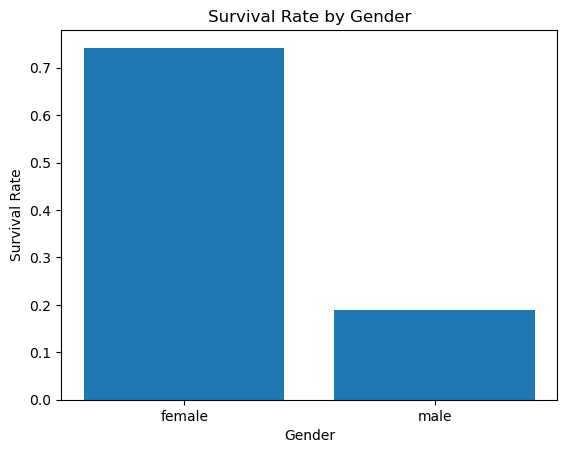

In [66]:
gender_survided = data.groupby("Sex")["Survived"].mean()
print(gender_survided)

plt.bar(gender_survided.index, gender_survided.values)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


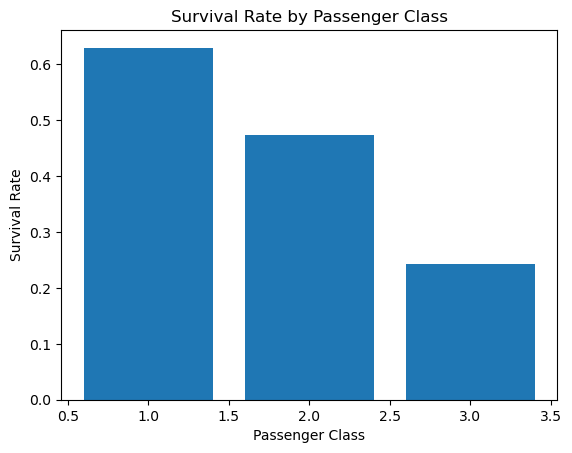

In [69]:
class_survival_rate = data.groupby("Pclass")["Survived"].mean()
print(class_survival_rate)

plt.bar(class_survival_rate.index, class_survival_rate.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()